# Kaggle Competition: House Prices: Advanced Regression Techniques

El objetivo de [esta competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) es **predecir el precio de las casas** en Ames, Iowa, utilizando un conjunto de datos de entrenamiento que contiene 79 variables. La métrica de evaluación es el **error cuadrático medio** (RMSE).

![image](https://www.kaggle.com/competitions/5407/images/header)


## 1. Cargar los datos

Como siempre en un proyecto de Machine Learning, lo primero que debemos hacer es cargar los datos. Para ello, seguiremos los siguientes pasos:

1. Darnos de alta en la plataforma de [Kaggle](https://www.kaggle.com/)
2. [Registrarnos en la competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).
3. Descargar los datos. Para ello nos dirigimos a la pestaña `Data` y descargamos el zip con los archivos: `train.csv`, `test.csv`, `data_description.txt` y `sample_submission.csv`, 
4. Los colocamos dentro de una carpeta llamada `data` en la raíz del proyecto. Recuerda que no subimos los datos a GitHub.
5. Cargamos los datos en un DataFrame de pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_CSV = 'data/train.csv'
TEST_CSV = 'data/test.csv'


train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
# añadimos el parámetro keys para diferenciar una parte de otra en el índice
df = pd.concat([train_df, test_df], keys=['train', 'test'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [2]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Creación del data dictionary:

In [3]:
feature_descriptions = []
with open('data/data_description.txt', 'r') as file:
    for line in file.readlines():
        valid_line = (line[0] != ' ') and (':' in line)
        if valid_line:
            feature_descriptions.append(line)

In [4]:
feature_descriptions = [i.split(':') for i in feature_descriptions]

In [5]:
data_dict = {item[0]: item[1].strip() for item in feature_descriptions}

In [6]:
data_dict['OverallQual']

'Rates the overall material and finish of the house'

En un esfuerzo por intentar mejorar la precisión del modelo en las predicciones, voy a hacer uso de todas las variables disponibles en el dataset.

In [7]:
# selected_columns = [ "OverallQual", "GrLivArea", "Neighborhood", "YearBuilt", "GarageCars", "TotalBsmtSF", "KitchenQual", "FullBath", "MSZoning", "LotArea", "SalePrice"]
# incluímos la variable objetivo

# all_data_df = all_data_df[selected_columns]
# all_data_df.head()

## 2. Explorar los datos (EDA)

Una vez que hemos cargado los datos, el siguiente paso es explorarlos. Para ello, seguiremos los siguientes pasos:


1. Mostrar un resumen de los datos.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   

2. Mostrar un resumen de los datos categóricos.


In [9]:
df.describe(include='object').T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


3. Mostrar un resumen de los datos numéricos.


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


4. Mostrar un resumen de los datos nulos.


In [11]:
pd.Series(df.columns[df.isnull().sum() > 0])

0         MSZoning
1      LotFrontage
2            Alley
3        Utilities
4      Exterior1st
5      Exterior2nd
6       MasVnrType
7       MasVnrArea
8         BsmtQual
9         BsmtCond
10    BsmtExposure
11    BsmtFinType1
12      BsmtFinSF1
13    BsmtFinType2
14      BsmtFinSF2
15       BsmtUnfSF
16     TotalBsmtSF
17      Electrical
18    BsmtFullBath
19    BsmtHalfBath
20     KitchenQual
21      Functional
22     FireplaceQu
23      GarageType
24     GarageYrBlt
25    GarageFinish
26      GarageCars
27      GarageArea
28      GarageQual
29      GarageCond
30          PoolQC
31           Fence
32     MiscFeature
33        SaleType
34       SalePrice
dtype: object

5. Visualizar la distribución de la variable objetivo.


Text(0.5, 1.0, 'Distribución de la variable objetivo: SalePrice')

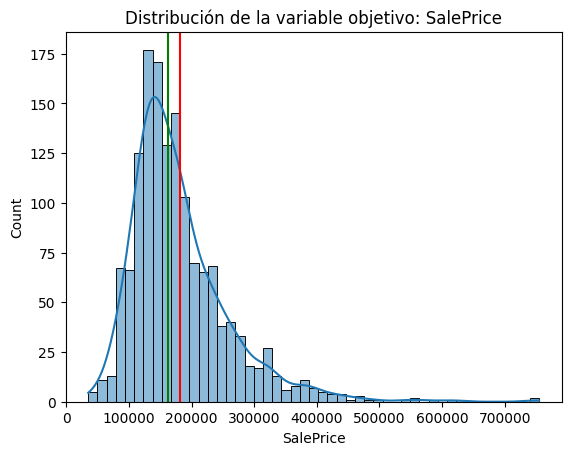

In [12]:
y = df['SalePrice']
ax = sns.histplot(y, kde=True)

ax.axvline(y.mean(), color='red')
ax.axvline(y.median(), color='green')
ax.set_title('Distribución de la variable objetivo: SalePrice')

6. Visualizar la correlación entre las variables numéricas.


Text(0.5, 1.0, 'Matriz de correlación')

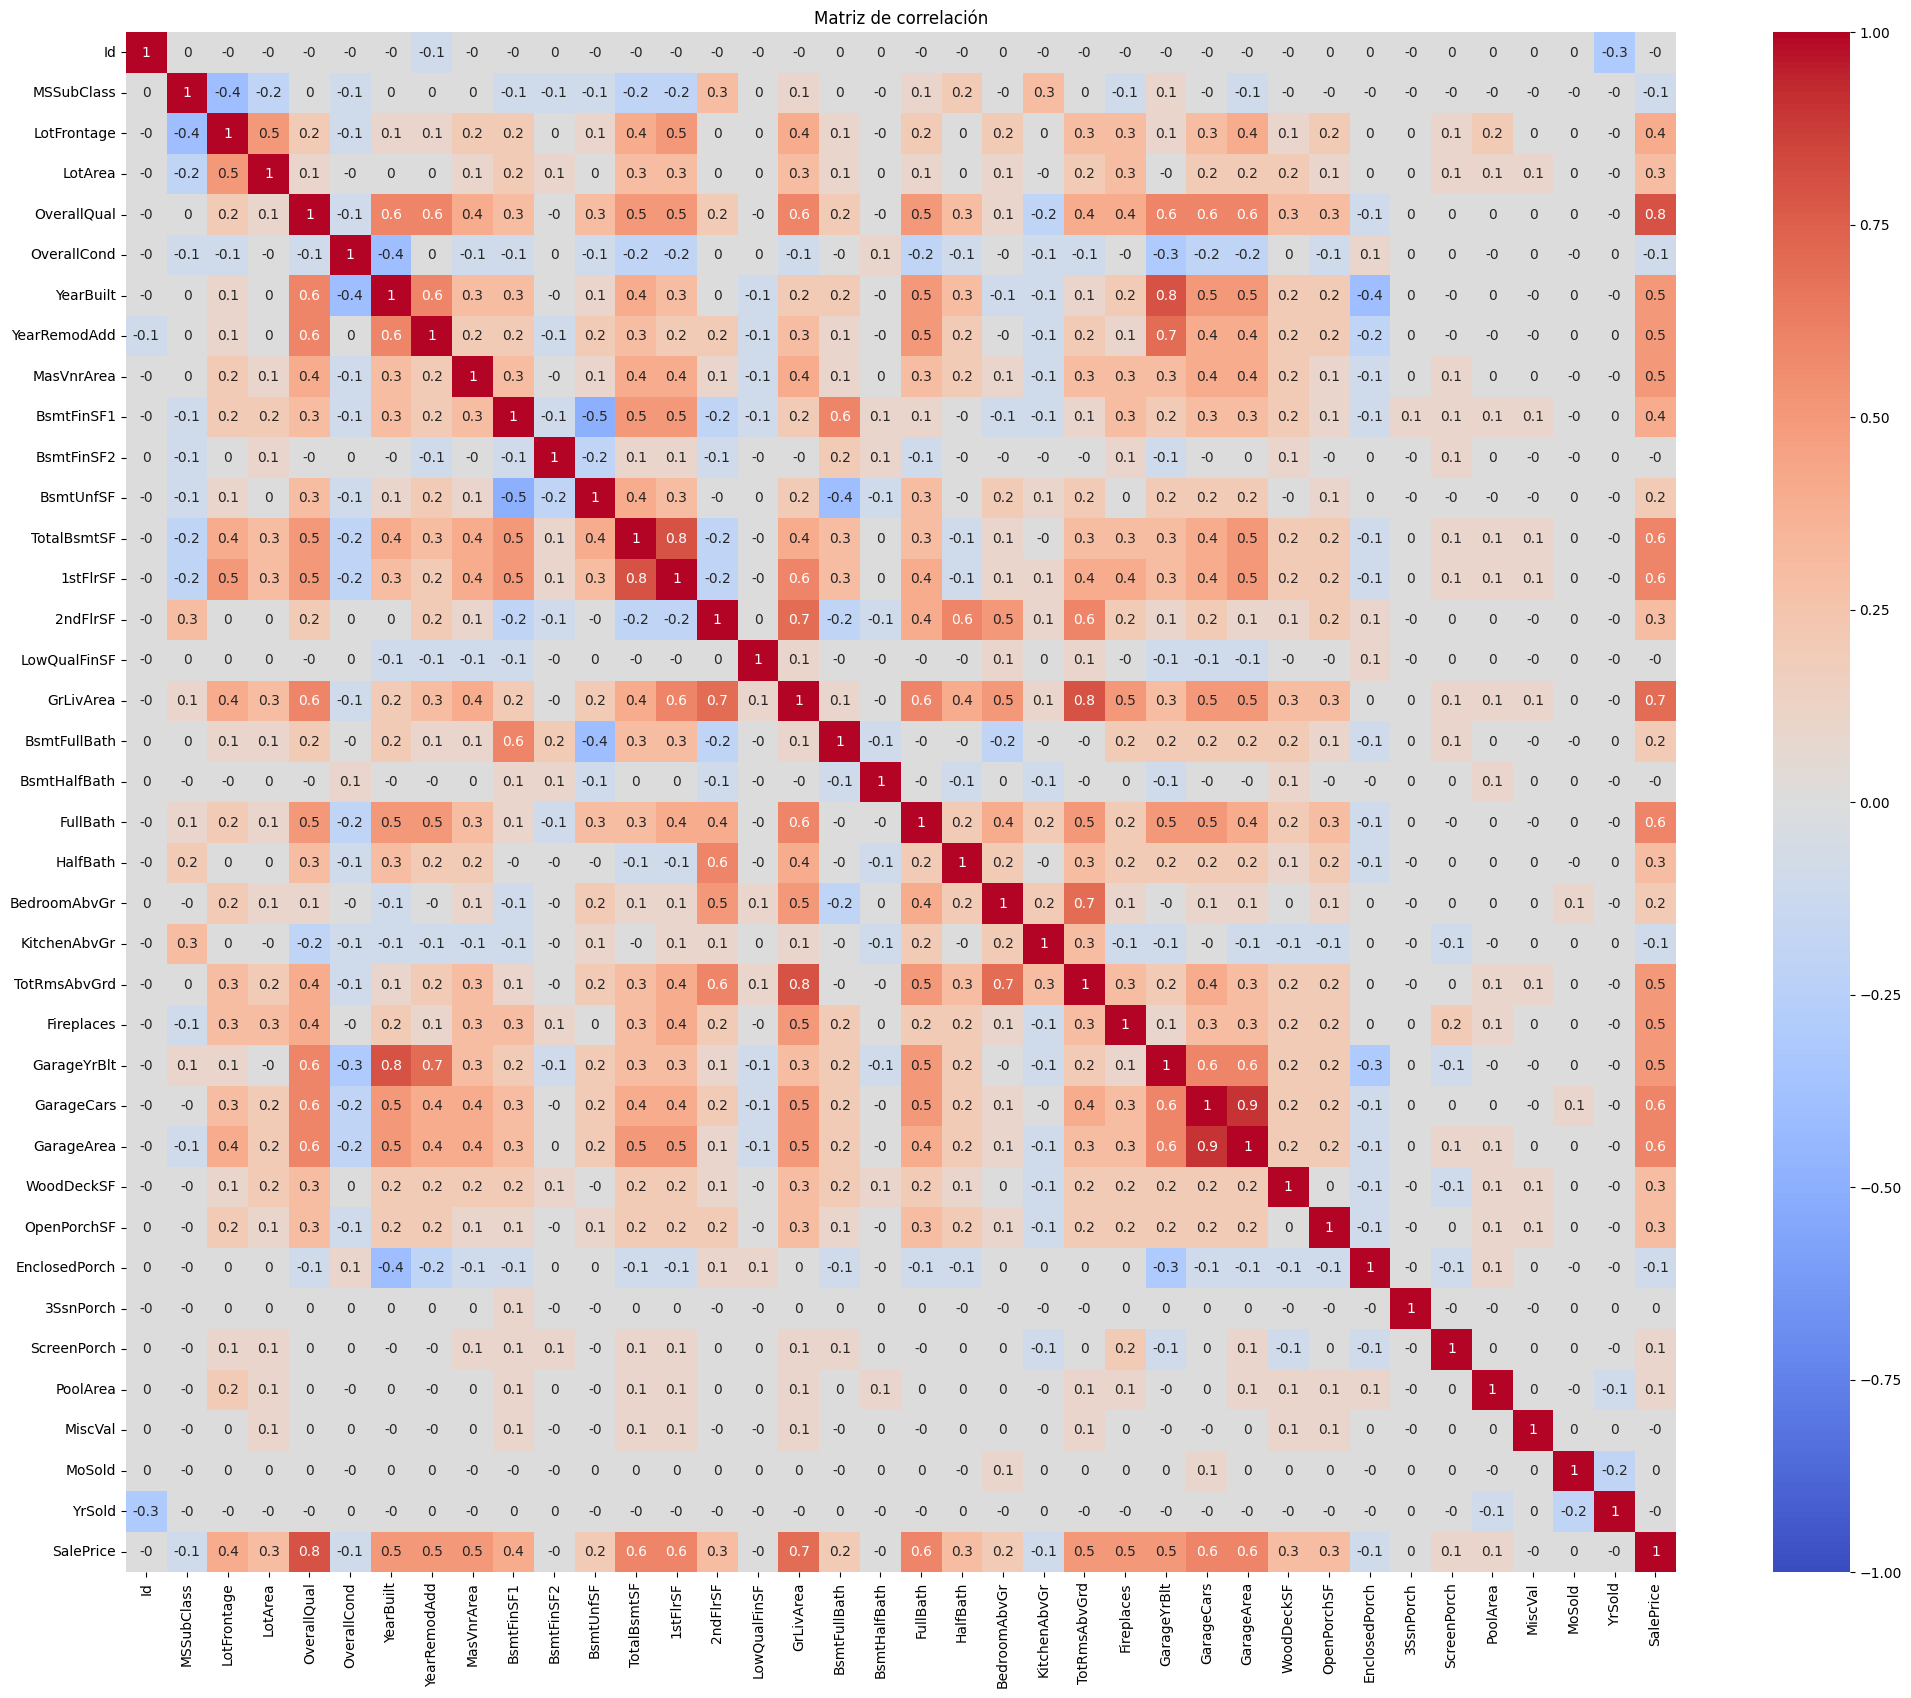

In [13]:
corr_matrix = df.corr(numeric_only=True).round(1)
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Matriz de correlación')

## 3. Preprocesamiento de los datos

Una vez que hemos explorado los datos, el siguiente paso es preprocesarlos. Para ello, seguiremos los siguientes pasos:

1. Tratar los datos nulos.
2. Codificar las variables categóricas.
3. Normalizar las variables numéricas.

In [14]:
x = df.drop(columns='SalePrice')
y = df['SalePrice']

Última comprobación de las features:

In [15]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Elimino la columna de `Id` porque no tiene sentido a la hora de entrenar el modelo.

In [16]:
x = x.drop('Id', axis=1)

### 3.1 Imputación de valores nulos

Obtengo una lista con las variables que tienen valores nulos.

In [17]:
na_count = x.isna().sum()
na_count[na_count > 0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

Variables con valores nulos

In [18]:
na_features = na_count.index

Variables categóricas con valores nulos

In [19]:
cat_features_na = x[na_features].select_dtypes('object').columns

In [20]:
cat_features_na

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Variables numéricas con valores nulos

In [21]:
num_features_na = x[na_features].select_dtypes('number').columns

In [22]:
num_features_na

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Vamos a imputar los valores nulos de las variables categóricas con la moda y los valores nulos de las variables numéricas con la media.

In [23]:
# fill categorical features with the mode
def fill_cat_feat_with_mode(series):
    mode = series.mode()[0]
    return series.fillna(mode)

Imputación de variables categóricas con la moda:

In [24]:
x[cat_features_na] = x[cat_features_na].apply(fill_cat_feat_with_mode, axis=0)

Imputación de variables numéricas con la mediana:

In [25]:
# fill numerical features with the median
def fill_num_feat_with_median(series):
    median = series.median()
    return series.fillna(median)

In [26]:
x[num_features_na] = x[num_features_na].apply(fill_num_feat_with_median, axis=0)

Confirmamos que no hay valores nulos.

In [27]:
any( x.isnull().sum() > 0 )

False

### 3.2 Normalizar las variables numéricas

Normalizar las variables numéricas es un paso importante en el preprocesamiento de los datos ya que permite que las variables tengan la misma escala, evitando que unas variables tengan más peso que otras en el modelo de Machine Learning. Para ello, utilizaremos el `StandardScaler` de `scikit-learn`.

El `StandardScaler` transforma las variables de forma que tengan media 0 y desviación estándar 1. Se diferencia del `MinMaxScaler` en que no transforma las variables a un rango específico, sino que las normaliza.

Veamos las variables numéricas que vamos a normalizar.

In [28]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2919.0,69.088386,21.317898,21.0,60.0,68.0,78.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2919.0,101.396026,178.854579,0.0,0.0,0.0,163.5,1600.0
BsmtFinSF1,2919.0,441.398253,455.534750,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2919.0,49.565262,169.179104,0.0,0.0,0.0,0.0,1526.0


Vamos a normalizar las variables numéricas utilizando el `StandardScaler`.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

x_numeric_df = x.select_dtypes('number')
x_numeric_scaled_data = scaler.fit_transform(x_numeric_df)

# keep indexes "train" and "test" to split the data later
x_numeric_scaled_df = pd.DataFrame(
    x_numeric_scaled_data,
    index=x_numeric_df.index,
    columns=x_numeric_df.columns,
)
x_numeric_scaled_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
train 0    0.067331    -0.191815 -0.217879     0.646183    -0.507284   
      1   -0.873616     0.511940 -0.072044    -0.063185     2.188279   
      2    0.067331    -0.051064  0.137197     0.646183    -0.507284   
      3    0.302568    -0.426400 -0.078385     0.646183    -0.507284   
      4    0.067331     0.699608  0.518903     1.355551    -0.507284   

         YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
train 0   1.046258      0.896833    0.529034    0.580959   -0.293025  ...   
      1   0.154764     -0.395604   -0.567016    1.178162   -0.293025  ...   
      2   0.980221      0.848965    0.338903    0.097928   -0.293025  ...   
      3  -1.859351     -0.682812   -0.567016   -0.494884   -0.293025  ...   
      4   0.947203      0.753229    1.390216    0.468984   -0.293025  ...   

         GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
train 0    0.348888   -0.740760     0.200006      -0.359601  -0.103331   
      1   -0.059804    1.614879    -0.702843      -0.359601  -0.103331   
      2    0.627542   -0.740760    -0.081209      -0.359601  -0.103331   
      3    0.785446   -0.740760    -0.184815       3.874967  -0.103331   
      4    1.686426    0.776967     0.540424      -0.359601  -0.103331   

         ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  
train 0    -0.285935  -0.06315 -0.089592 -1.552184  0.157646  
      1    -0.285935  -0.06315 -0.089592 -0.446925 -0.602962  
      2    -0.285935  -0.06315 -0.089592  1.026753  0.157646  
      3    -0.285935  -0.06315 -0.089592 -1.552184 -1.363569  
      4    -0.285935  -0.06315 -0.089592  2.132012  0.157646  

[5 rows x 36 columns]

### 3.3 Codificar las variables categóricas

Recordemos que las variables categóricas deben ser codificadas para poder ser utilizadas en un modelo de Machine Learning. Para ello, utilizaremos el `LabelEncoder` de `scikit-learn`. Primero veamos cuales son las variables categóricas.

In [31]:
x.select_dtypes('object').head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
train 0       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
      1       RL   Pave  Grvl      Reg         Lvl    AllPub       FR2   
      2       RL   Pave  Grvl      IR1         Lvl    AllPub    Inside   
      3       RL   Pave  Grvl      IR1         Lvl    AllPub    Corner   
      4       RL   Pave  Grvl      IR1         Lvl    AllPub       FR2   

        LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
train 0       Gtl      CollgCr       Norm  ...     Attchd          RFn   
      1       Gtl      Veenker      Feedr  ...     Attchd          RFn   
      2       Gtl      CollgCr       Norm  ...     Attchd          RFn   
      3       Gtl      Crawfor       Norm  ...     Detchd          Unf   
      4       Gtl      NoRidge       Norm  ...     Attchd          RFn   

        GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
train 0         TA         TA          Y     Ex  MnPrv        Shed       WD   
      1         TA         TA          Y     Ex  MnPrv        Shed       WD   
      2         TA         TA          Y     Ex  MnPrv        Shed       WD   
      3         TA         TA          Y     Ex  MnPrv        Shed       WD   
      4         TA         TA          Y     Ex  MnPrv        Shed       WD   

        SaleCondition  
train 0        Normal  
      1        Normal  
      2        Normal  
      3       Abnorml  
      4        Normal  

[5 rows x 43 columns]

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
def label_encode_column(column):
    le = LabelEncoder()
    encoded_series = le.fit_transform(column)
    return encoded_series

Variables categóricas:

In [34]:
cat_features = x.select_dtypes('object').columns

In [35]:
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
x[cat_features] = x[cat_features].apply(label_encode_column, axis=0)

Veamos cómo han quedado codificadas las variables categóricas.

In [37]:
x[cat_features].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
train 0         3       1      0         3            3          0          4   
      1         3       1      0         3            3          0          2   
      2         3       1      0         0            3          0          4   
      3         3       1      0         0            3          0          0   
      4         3       1      0         0            3          0          2   

         LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
train 0          0             5           2  ...           1             1   
      1          0            24           1  ...           1             1   
      2          0             5           2  ...           1             1   
      3          0             6           2  ...           5             2   
      4          0            15           2  ...           1             1   

         GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  \
train 0           4           4           2       0      2            2   
      1           4           4           2       0      2            2   
      2           4           4           2       0      2            2   
      3           4           4           2       0      2            2   
      4           4           4           2       0      2            2   

         SaleType  SaleCondition  
train 0         8              4  
      1         8              4  
      2         8              4  
      3         8              0  
      4         8              4  

[5 rows x 43 columns]

## 4. Split de los datos

Al estar en Kaggle y tener los datos de entrenamiento y test separados, no necesitamos dividir los datos en entrenamiento y test. Sin embargo, **vamos a dividir los datos de entrenamiento en entrenamiento y validación** para poder evaluar el rendimiento de nuestro modelo.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
SPLIT_RATIO = 0.2
SEED = 42

Estos son los datos limpios que usaremos para predecir y enviar a Kaggle:

In [40]:
X_test = x.xs('test')  # también es posible usar: X_clean_df.loc['test´]

Estos son los datos que usaremos para entrenar y validar nuestro modelo

In [41]:
X_train = x.loc['train']
y_train = y.loc['train']

Dividimos los datos de entrenamiento en: entrenamiento y validación

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=SPLIT_RATIO,
                                                  random_state=SEED
                                                 )

## 5. Entrenar un modelo

Una vez que hemos preprocesado los datos, el siguiente paso es entrenar un modelo. En este caso **se trata de un problema de regresión**, por lo que vamos a utilizar un modelo de regresión. En concreto, vamos a utilizar un **modelo de regresión lineal**. Este modelo se encuentra en la librería `scikit-learn` dentro de la clase `LinearRegression`.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.linear_model import Lasso, Ridge

Creamos y entrenamos un modelo de regresión lineal:

In [45]:
lm = LinearRegression()

Entremamos el modelo:

In [46]:
lm.fit(X_train, y_train)

LinearRegression()

Calculamos los valores predichos por el modelo:

In [47]:
y_pred = lm.predict(X_val)

Mido el rendimiento del modelo calculando su *mean squared error* y su coeficiente de determinación ($R^2$).

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# calculamos el error cuadrático medio comparando las predicciones con los valores reales
mse = mean_squared_error(y_val, y_pred)
r2_score_model = r2_score(y_val, y_pred)
f"Mean Squared Error: {mse:.2f}, R2 score: {r2_score_model:.2f}"

'Mean Squared Error: 1348160466.40, R2 score: 0.82'

En un intento por mejorar las puntuaciones, usaré *métodos de Regularización (L1 yL2)*.

Creamos un modelo de regresión linear, regularizado de tipo L1 (Lasso)

In [50]:
lasso_model = Lasso()

Genero una lista de valores del parámetro alfa para optimizar con GridSearchCV

In [51]:
lasso_param_grid = {'alpha': np.logspace(-4, 4, 10)}

Buscamos un valor óptimo del hiperparámetro alfa

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
lasso_model_cv = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

Entrenamos el modelo

In [54]:
lasso_model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

Modelo Ridge (regularización L2)

In [55]:
ridge_model = Ridge()

Genero una lista de valores del parámetro alfa para optimizar con GridSearchCV

In [56]:
ridge_param_grid = {'alpha': np.logspace(-4, 4, 10)}

Buscamos un valor óptimo del hiperparámetro alfa

In [57]:
ridge_model_cv = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

Entrenamos el modelo

In [58]:
ridge_model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

## 6. Evaluar el modelo

Una vez que hemos entrenado el modelo, el siguiente paso es evaluarlo. Para ello, vamos a calcular el **error cuadrático medio** (RMSE) en el conjunto de validación.

Usando Lasso:

In [59]:
# obtenemos las predicciones para los datos de validación
y_pred = lasso_model_cv.predict(X_val)

# calculamos el error cuadrático medio comparando las predicciones con los valores reales
mse = mean_squared_error(y_val, y_pred)
r2_score_model = r2_score(y_val, y_pred)
f"Mean Squared Error: {mse:.4e}, R2 score: {r2_score_model:.2f}"

'Mean Squared Error: 1.1958e+09, R2 score: 0.84'

Usando Ridge:

In [60]:
# obtenemos las predicciones para los datos de validación
y_pred = ridge_model_cv.predict(X_val)

# calculamos el error cuadrático medio comparando las predicciones con los valores reales
mse = mean_squared_error(y_val, y_pred)
r2_score_model = r2_score(y_val, y_pred)
f"Mean Squared Error: {mse:.4e}, R2 score: {r2_score_model:.2f}"

'Mean Squared Error: 1.2148e+09, R2 score: 0.84'

In [61]:
x.shape

(2919, 79)

## 7. Envío de los datos

Finalmente, una vez que hemos entrenado y evaluado el modelo, el último paso es predecir los precios de las casas en el conjunto de test y enviar los resultados a Kaggle para obtener la puntuación final.

¡Vamos a por ello! 🚀

El archivo `sample_submission.csv` contiene el formato en el que debemos enviar nuestras predicciones. Vamos a cargarlo para ver cómo debemos estructurar nuestros datos.

In [62]:
SAMPLE_SUBMISSION_CSV = 'data/sample_submission.csv'
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_CSV)
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Vemos que tiene 2 columnas: `Id` y `SalePrice`. `Id` es el identificador de la casa y `SalePrice` es el precio que debemos predecir. vamos a obtener las predicciones de nuestro modelo y a guardarlas en un DataFrame con esas columnas.

La regularización Lasso (L1) consiguió un error cuadrático medio ligeramente inferior.

In [63]:
test_predictions_lasso = lasso_model_cv.predict(X_test)
test_ids = test_df['Id']
submission_data = {
    'Id': test_ids,
    'SalePrice': test_predictions_lasso,
}
submission_df_lasso = pd.DataFrame(submission_data)
submission_df_lasso.head()

,Id,SalePrice
0,1461,129083.030572
1,1462,157642.658371
2,1463,175366.841156
3,1464,189256.362390
4,1465,202245.933128


Guardamos las predicciones en un archivo CSV para enviar a Kaggle.

In [64]:
submission_df_lasso.to_csv('data/submission_lasso.csv', index=False)